# Introduction to Programming with Python

# Unit 7: Recursion and the Beauty of Programming

As we are coming towards the end of our module, let's focus on more difficult topics, while also exploring some more beautiful fractal figures.

## Recursion

We have just discussed Fibonacci numbers, which are defined in the following way (if we number them starting from 0, as all programmers do):
$$
\begin{array}{l}
f_n = 1, 0\le n\le 1 \\
f_n = f_{n-1} + f_{n-2}, \quad n\ge2\\
\end{array}
$$

We have used some clever trick to compute them, having two variables:

In [7]:
def fib(n):
    c,p = 1,1
    for _ in range(n):
        c,p = c+p,c
    return p

fib(10)

89

However, we may also define the same function in another way, very similar to the mathematical definition of Fibonacci number given above:

In [8]:
def fib(n):
    if n<=1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
fib(10)

89

You may be surprised: how is it possible to use the function `fib` inside its own definition? In face, such technique is called **recursion**, and it often used in programming. 

Let us consider the example of calculating `fib(3)`. Recursion works as follows:

1. To calculate `fib(3)`, the function calls `fib(2)` and `fib(1)`
2. When `fib(2)` is called, it calls `fib(1)` and `fib(0)`.
3. Both of those calls `return 1` (because the argument `n` is less than 2)
4. Thus `fib(2)` is computed as `1+1=2`
5. When `fib(1)` is called in step 1, it also returns 1 (as in step 3)
6. `fib(3)` is computed to be equal to `2+1=3`.

We can actually add some `print` operators to the function to see how those calls are made:

In [9]:
def fib(n):
    print(f'Calling fib({n})')
    if n<=1:
        print(f'fib({n}) returns 1')
        return 1
    else:
        f1 = fib(n-1)
        f2 = fib(n-2)
        print(f'fib({n}) returns {f1+f2}={f1}+{f2}')
        return f1+f2 
    
fib(3)

Calling fib(3)
Calling fib(2)
Calling fib(1)
fib(1) returns 1
Calling fib(0)
fib(0) returns 1
fib(2) returns 2=1+1
Calling fib(1)
fib(1) returns 1
fib(3) returns 3=2+1


3

You may notice that during those computations `fib(1)` is called twice. In fact, if you try to compute `fib` for any number larger than 20, you may notice significant delay - that is because number of calls to function `fib` increases very rapidly. For example, to compute `fib(16)` we would need to make aroung 65000 calls, while during our previous algorithm with a loop we need to repeat the loop only 16 times.

This does not necessarily mean that recursion is bad. Sometimes it is not easy to program an algorithm without recursion, as we will see in the next example. However, if you can think of a non-recursive way to solve the problem - you should prefer it, because it is likely to be more effective. However, recursive algorithms often tend to be shorter and more beautiful.

## Koch Snowflake

The best graphical example of recursion is a **[Koch Snowflake](https://en.wikipedia.org/wiki/Koch_snowflake)**, which looks like this:

![Koch Snowflake](../images/KochFlake.PNG)
Image [from Wikipedia](https://commons.wikimedia.org/w/index.php?curid=1898291), CC BY-SA 3.0

This picture shows snowflakes of different *complexities*:

* When complexity $n=0$ (first figure), to draw one side of the snowflake of size $x$ we just draw a straight line of length $x$
* When complexity $n=1$ (second figure), we draw the side in the following manner:
   - Draw the side of length $x\over3$ and complexity $0$
   - Turn $60^\circ$ left
   - Draw the side of length $x\over3$ and complexity $0$
   - Turn $120^\circ$ right
   - Draw the side of length $x\over3$ and complexity $0$
   - Turn $60^\circ$ left
* In a similar manner, for any other complexity $n>1$:
   - Draw the side of length $x\over3$ and complexity $n-1$
   - Turn $60^\circ$ left
   - Draw the side of length $x\over3$ and complexity $n-1$
   - Turn $120^\circ$ right
   - Draw the side of length $x\over3$ and complexity $n-1$
   - Turn $60^\circ$ left

You probably recognized *recursion* in this algorithm:
* For $n=0$ - we draw straight line. This is called **termination** of recursion, because we do not make a recursive call to the function
* For $n>0$ - we follow the algorithm described above, which involves calling the same function with argument $n-1$

The function to draw **Koch Curve** will look like this:

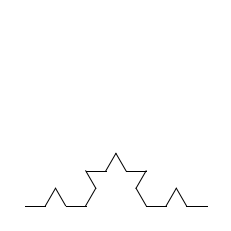

In [17]:
import jturtle as turtle

def koch_curve(n,x):
    if n==0:
        turtle.forward(x)
    else:
        koch_curve(n-1,x/3)
        turtle.left(60)
        koch_curve(n-1,x/3)
        turtle.right(120)
        koch_curve(n-1,x/3)
        turtle.left(60)
        koch_curve(n-1,x/3)

turtle.right(90)
koch_curve(2,100)
turtle.done()

Let's draw Koch curvers with different $n$-s:

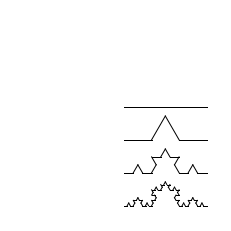

In [18]:
turtle.right(90)
for n in range(4):
    koch_curve(n,100)
    turtle.penup()
    turtle.forward(-100)
    turtle.right(90)
    turtle.forward(40)
    turtle.left(90)
    turtle.pendown()
turtle.done()

Finally, to produce Koch's Snowflake, we need to draw 3 Koch curves:

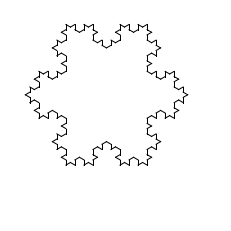

In [20]:
def koch_snowflake(n,x):
    for _ in range(3):
        koch_curve(n,x)
        turtle.right(120)

koch_snowflake(3,100)
turtle.done()

## Minkowski Island

A very similar figure to Koch Snowflake is called **Minkowski Island**, or **Quadratic Koch Curve**. The idea is similar, but instead of turning 60 degrees - we turn 90.

![](../images/Quadratic_Koch_curve_type2_iterations.png)
By <a title="User:Prokofiev" href="//commons.wikimedia.org/wiki/User:Prokofiev">Prokofiev</a> - <span class="int-own-work" lang="en">Own work</span>, <a title="Creative Commons Attribution-Share Alike 4.0" href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=3194494">Link</a>

While writing this function, we will try to be creative and use loop to draw each part of the curve. The trick is to use the **list** of all angles that we need to turn in between, together with their direction (i.e. 90 will mean turn $90^\circ$ left, 0 - do not turn at all, and -90 - turn $90^\circ$ right)

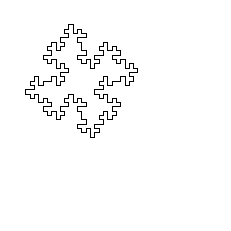

In [25]:
def minkowski(n,x):
    if n==0:
        turtle.forward(x)
    else:
        for t in [90,-90,-90,0,90,90,-90,0]:
            minkowski(n-1,x/4)
            turtle.left(t)
            
for _ in range(4):
    minkowski(2,100)
    turtle.left(90)
turtle.done()

## Flowers and Trees

If you continue studying Programming or Computer Science, you will learn that an important data structure is **tree** - a collection of elements that have parent and child elements. For example, folders or directories in our computer form a tree.

In our final example, we will draw something similar to a tree, and on the other hand similar to a dandelion or some umbrella-like plant. We will start with one branch, and then for each branch generate $n$ sub-branches, and so on. 

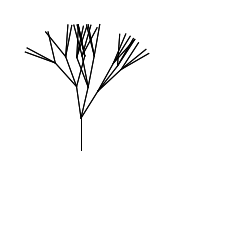

In [31]:
from random import randint
def tree(n,b,x):
    turtle.forward(x) # draw the branch
    if n>0: # draw n sub-branches on top of it
        for _ in range(b):
            a = randint(-40,40)
            turtle.left(a)
            tree(n-1,b,x)
            turtle.right(a)
    turtle.forward(-x) # move back to the beginning of the branch

tree(3,3,100)
turtle.done()

This code is very clever, and it might take you some time to figure out. The difficult thing here is to make turtle return to the original position each time the branch is drawn. So, at the top level, the logic of the function is the following:
* Draw one branch by calling `forward(x)`
* Optionally (if $n>0$), draw $b$ sub-branches. Here $b$ is the **branching factor**. 
* Move back to the starting position by calling `forward(-x)`.

When drawing branched, we always assume that `tree` moves the turtle back to its original position before the drawing.

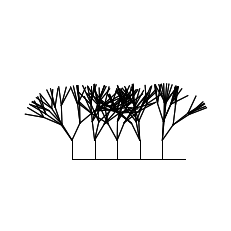

In [33]:
for _ in range(5):
    tree(3,3,100)
    turtle.right(90)
    turtle.forward(120)
    turtle.left(90)
turtle.done()

We have cosidered just a few examples of drawing trees, but there could be many more. For example, try to experiment with our `tree` function to produce different types of flora by doing one or more of the following:
* Experiment with different branching factors
* The line `a = randint(-40,40)` defines random angle for each branch. By changing the angles you can control the spread of branches, and also whether the tree would look *straight*, or falling to the left or right
* Try to make branches shorter and longer as you go up towards the top of the tree. This can be achieved by multiplying `x` by some **growth factor**, which should be somewhat close to 1
* You may pass angle boundaries and growth factor as parameters to play with them freely. Finally, produce a forest that combines different kinds of trees together. 

## The Beauty of Programming

I hope you would agree with me, that in the examples above we have managed to draw pretty beautiful pictures! They are not only pleasant aesthetically, but they are beautiful in *mathematical* sense. Koch Snowflake and Minkowski Island are examples of **fractal structures**, which can be infinitely complex, i.e. if you draw such a figure for very large $n$, you would be able to zoom into it, and part of the figure would be similar to the original one. Ideally, such a fractal would be infinitely complex. However, we managed to write a simple and rather short program, which can produce arbitrary complex figures. I believe this shows the main beauty of programming -- with simple code you can program computer to perform many complex operations and achieve very complex results!

## Where to go Next

Of course, real programs are more complex than those we have seen in this course, and you are still to learn how to fight complexity in programming. However, Python is a very good starting point, because from here you can start exploring programming in many different directions:

* **Web Programming** is about creating web sites. You can use Python and Django Framework to create web applications [see how](https://channel9.msdn.com/shows/Azure-Friday/Python-on-Azure-Part-1-Building-Django-apps-with-Visual-Studio-Code/?WT.mc_id=python-github-dmitryso)
* You can do **Game Development** with Python, a good place to start would be [PyGame](https://www.pygame.org) library. And you can also run Python on small programmable consoles, like [PyBadge](https://learn.adafruit.com/adafruit-pybadge)
<img src="../images/pybadge.jpg" width="30%"/><br/>
Picture from [this project at hackday.io](https://hackaday.io/project/164929/gallery#692b286060e43ce2e9ae50b5c3b1b0c5)
* **Data Science** is a branch of computer science which studies the ways you can extract knowledge from data. For example, having a large set of people's photographs and their corresponding age you can create a program that will **learn** how to determine person's age from a picture. This is closely related to another discipline, **Artificial Intelligence**. See [this example](http://aka.ms/facestudies) for how you can use information extracted from people's photographs to make interesting conclusions.
* **Science Art** is another direction at the intersection of science and art. Python is a great language for science art, because it contains powerful libraries for image manipulation. See [this blog post](http://aka.ms/peopleblending) on how you can create your own cognitive portrait from photographs like this one:
<img src="../images/VickieRotator.png" width="30%"/>

And there are many more areas where Pyton can be used as a language! However, before diving right into one of those specific areas, I suggest that you learn a little bit more of core language features in our next course. 

I hope you enjoyed the course, and are curious to learn more! Good luck!